# The Secant Method for Root Finding

## Introduction

The **Secant Method** is a root-finding algorithm that uses a succession of roots of secant lines to approximate a root of a function $f(x) = 0$. It can be thought of as a finite-difference approximation of Newton-Raphson method, eliminating the need to compute derivatives.

## Mathematical Foundation

### Derivation from Newton's Method

Newton's method uses the iteration:

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

When the derivative $f'(x_n)$ is difficult or expensive to compute, we can approximate it using a finite difference:

$$f'(x_n) \approx \frac{f(x_n) - f(x_{n-1})}{x_n - x_{n-1}}$$

### The Secant Method Formula

Substituting this approximation into Newton's formula yields the **Secant Method**:

$$x_{n+1} = x_n - f(x_n) \cdot \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}$$

Equivalently, this can be written as:

$$x_{n+1} = \frac{x_{n-1} f(x_n) - x_n f(x_{n-1})}{f(x_n) - f(x_{n-1})}$$

### Geometric Interpretation

Geometrically, the secant method constructs the line through the points $(x_{n-1}, f(x_{n-1}))$ and $(x_n, f(x_n))$, then finds where this secant line intersects the $x$-axis. This intersection point becomes $x_{n+1}$.

### Convergence Analysis

The order of convergence of the secant method is:

$$p = \frac{1 + \sqrt{5}}{2} = \phi \approx 1.618$$

This is the **golden ratio**, making the secant method **superlinear** but slower than Newton's method (which has quadratic convergence, $p = 2$). However, each iteration of the secant method requires only **one function evaluation** compared to Newton's method which requires both $f(x_n)$ and $f'(x_n)$.

### Error Analysis

For a simple root where $f'(r) \neq 0$, the error $e_n = x_n - r$ satisfies:

$$|e_{n+1}| \approx \left| \frac{f''(r)}{2f'(r)} \right| |e_n| |e_{n-1}|$$

### Advantages and Disadvantages

**Advantages:**
- No derivative computation required
- Faster convergence than bisection method
- Only one function evaluation per iteration (after initialization)

**Disadvantages:**
- Requires two initial guesses
- May diverge if initial guesses are poor
- No guaranteed convergence (unlike bisection)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Set up matplotlib for publication-quality figures
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'legend.fontsize': 10,
    'figure.figsize': (12, 10),
    'lines.linewidth': 2
})

In [2]:
def secant_method(f, x0, x1, tol=1e-10, max_iter=100):
    """
    Secant method for finding roots of f(x) = 0.
    
    Parameters:
    -----------
    f : callable
        The function for which we seek a root
    x0 : float
        First initial guess
    x1 : float
        Second initial guess
    tol : float
        Tolerance for convergence
    max_iter : int
        Maximum number of iterations
    
    Returns:
    --------
    root : float
        Approximation to the root
    history : list
        List of all iterates
    errors : list
        List of |f(x_n)| values
    """
    history = [x0, x1]
    errors = [abs(f(x0)), abs(f(x1))]
    
    for i in range(max_iter):
        f_x0 = f(x0)
        f_x1 = f(x1)
        
        # Check for division by zero
        if abs(f_x1 - f_x0) < 1e-15:
            print(f"Warning: Division by near-zero at iteration {i}")
            break
        
        # Secant method formula
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        
        history.append(x2)
        errors.append(abs(f(x2)))
        
        # Check convergence
        if abs(x2 - x1) < tol or abs(f(x2)) < tol:
            return x2, history, errors
        
        # Update for next iteration
        x0, x1 = x1, x2
    
    print(f"Warning: Maximum iterations ({max_iter}) reached")
    return x2, history, errors

## Example 1: Finding $\sqrt{2}$

We seek the positive root of $f(x) = x^2 - 2$, which is $\sqrt{2} \approx 1.41421356...$

In [3]:
# Define the function
def f1(x):
    return x**2 - 2

# Apply secant method
root1, history1, errors1 = secant_method(f1, x0=1.0, x1=2.0)

print("Finding √2 using the Secant Method")
print("=" * 50)
print(f"True value: {np.sqrt(2):.15f}")
print(f"Computed root: {root1:.15f}")
print(f"Absolute error: {abs(root1 - np.sqrt(2)):.2e}")
print(f"Iterations: {len(history1) - 2}")
print("\nIteration history:")
for i, (x, err) in enumerate(zip(history1, errors1)):
    print(f"  x_{i} = {x:.15f}, |f(x)| = {err:.2e}")

Finding √2 using the Secant Method
True value: 1.414213562373095
Computed root: 1.414213562373095
Absolute error: 2.22e-16
Iterations: 6

Iteration history:
  x_0 = 1.000000000000000, |f(x)| = 1.00e+00
  x_1 = 2.000000000000000, |f(x)| = 2.00e+00
  x_2 = 1.333333333333333, |f(x)| = 2.22e-01
  x_3 = 1.400000000000000, |f(x)| = 4.00e-02
  x_4 = 1.414634146341463, |f(x)| = 1.19e-03
  x_5 = 1.414211438474870, |f(x)| = 6.01e-06
  x_6 = 1.414213562057320, |f(x)| = 8.93e-10
  x_7 = 1.414213562373095, |f(x)| = 8.88e-16


## Example 2: Transcendental Equation

Find the root of $f(x) = x - \cos(x)$, which occurs at approximately $x \approx 0.739085...$

In [4]:
# Define the transcendental function
def f2(x):
    return x - np.cos(x)

# Apply secant method
root2, history2, errors2 = secant_method(f2, x0=0.0, x1=1.0)

print("Finding root of x - cos(x) = 0")
print("=" * 50)
print(f"Computed root: {root2:.15f}")
print(f"Verification f(root): {f2(root2):.2e}")
print(f"Iterations: {len(history2) - 2}")
print("\nIteration history:")
for i, (x, err) in enumerate(zip(history2, errors2)):
    print(f"  x_{i} = {x:.15f}, |f(x)| = {err:.2e}")

Finding root of x - cos(x) = 0
Computed root: 0.739085133215001
Verification f(root): -2.67e-13
Iterations: 5

Iteration history:
  x_0 = 0.000000000000000, |f(x)| = 1.00e+00
  x_1 = 1.000000000000000, |f(x)| = 4.60e-01
  x_2 = 0.685073357326045, |f(x)| = 8.93e-02
  x_3 = 0.736298997613654, |f(x)| = 4.66e-03
  x_4 = 0.739119361911629, |f(x)| = 5.73e-05
  x_5 = 0.739085112127464, |f(x)| = 3.53e-08
  x_6 = 0.739085133215001, |f(x)| = 2.67e-13


## Visualization of the Secant Method

We now create a comprehensive visualization showing:
1. The geometric interpretation with secant lines
2. Convergence behavior
3. Comparison of convergence rates

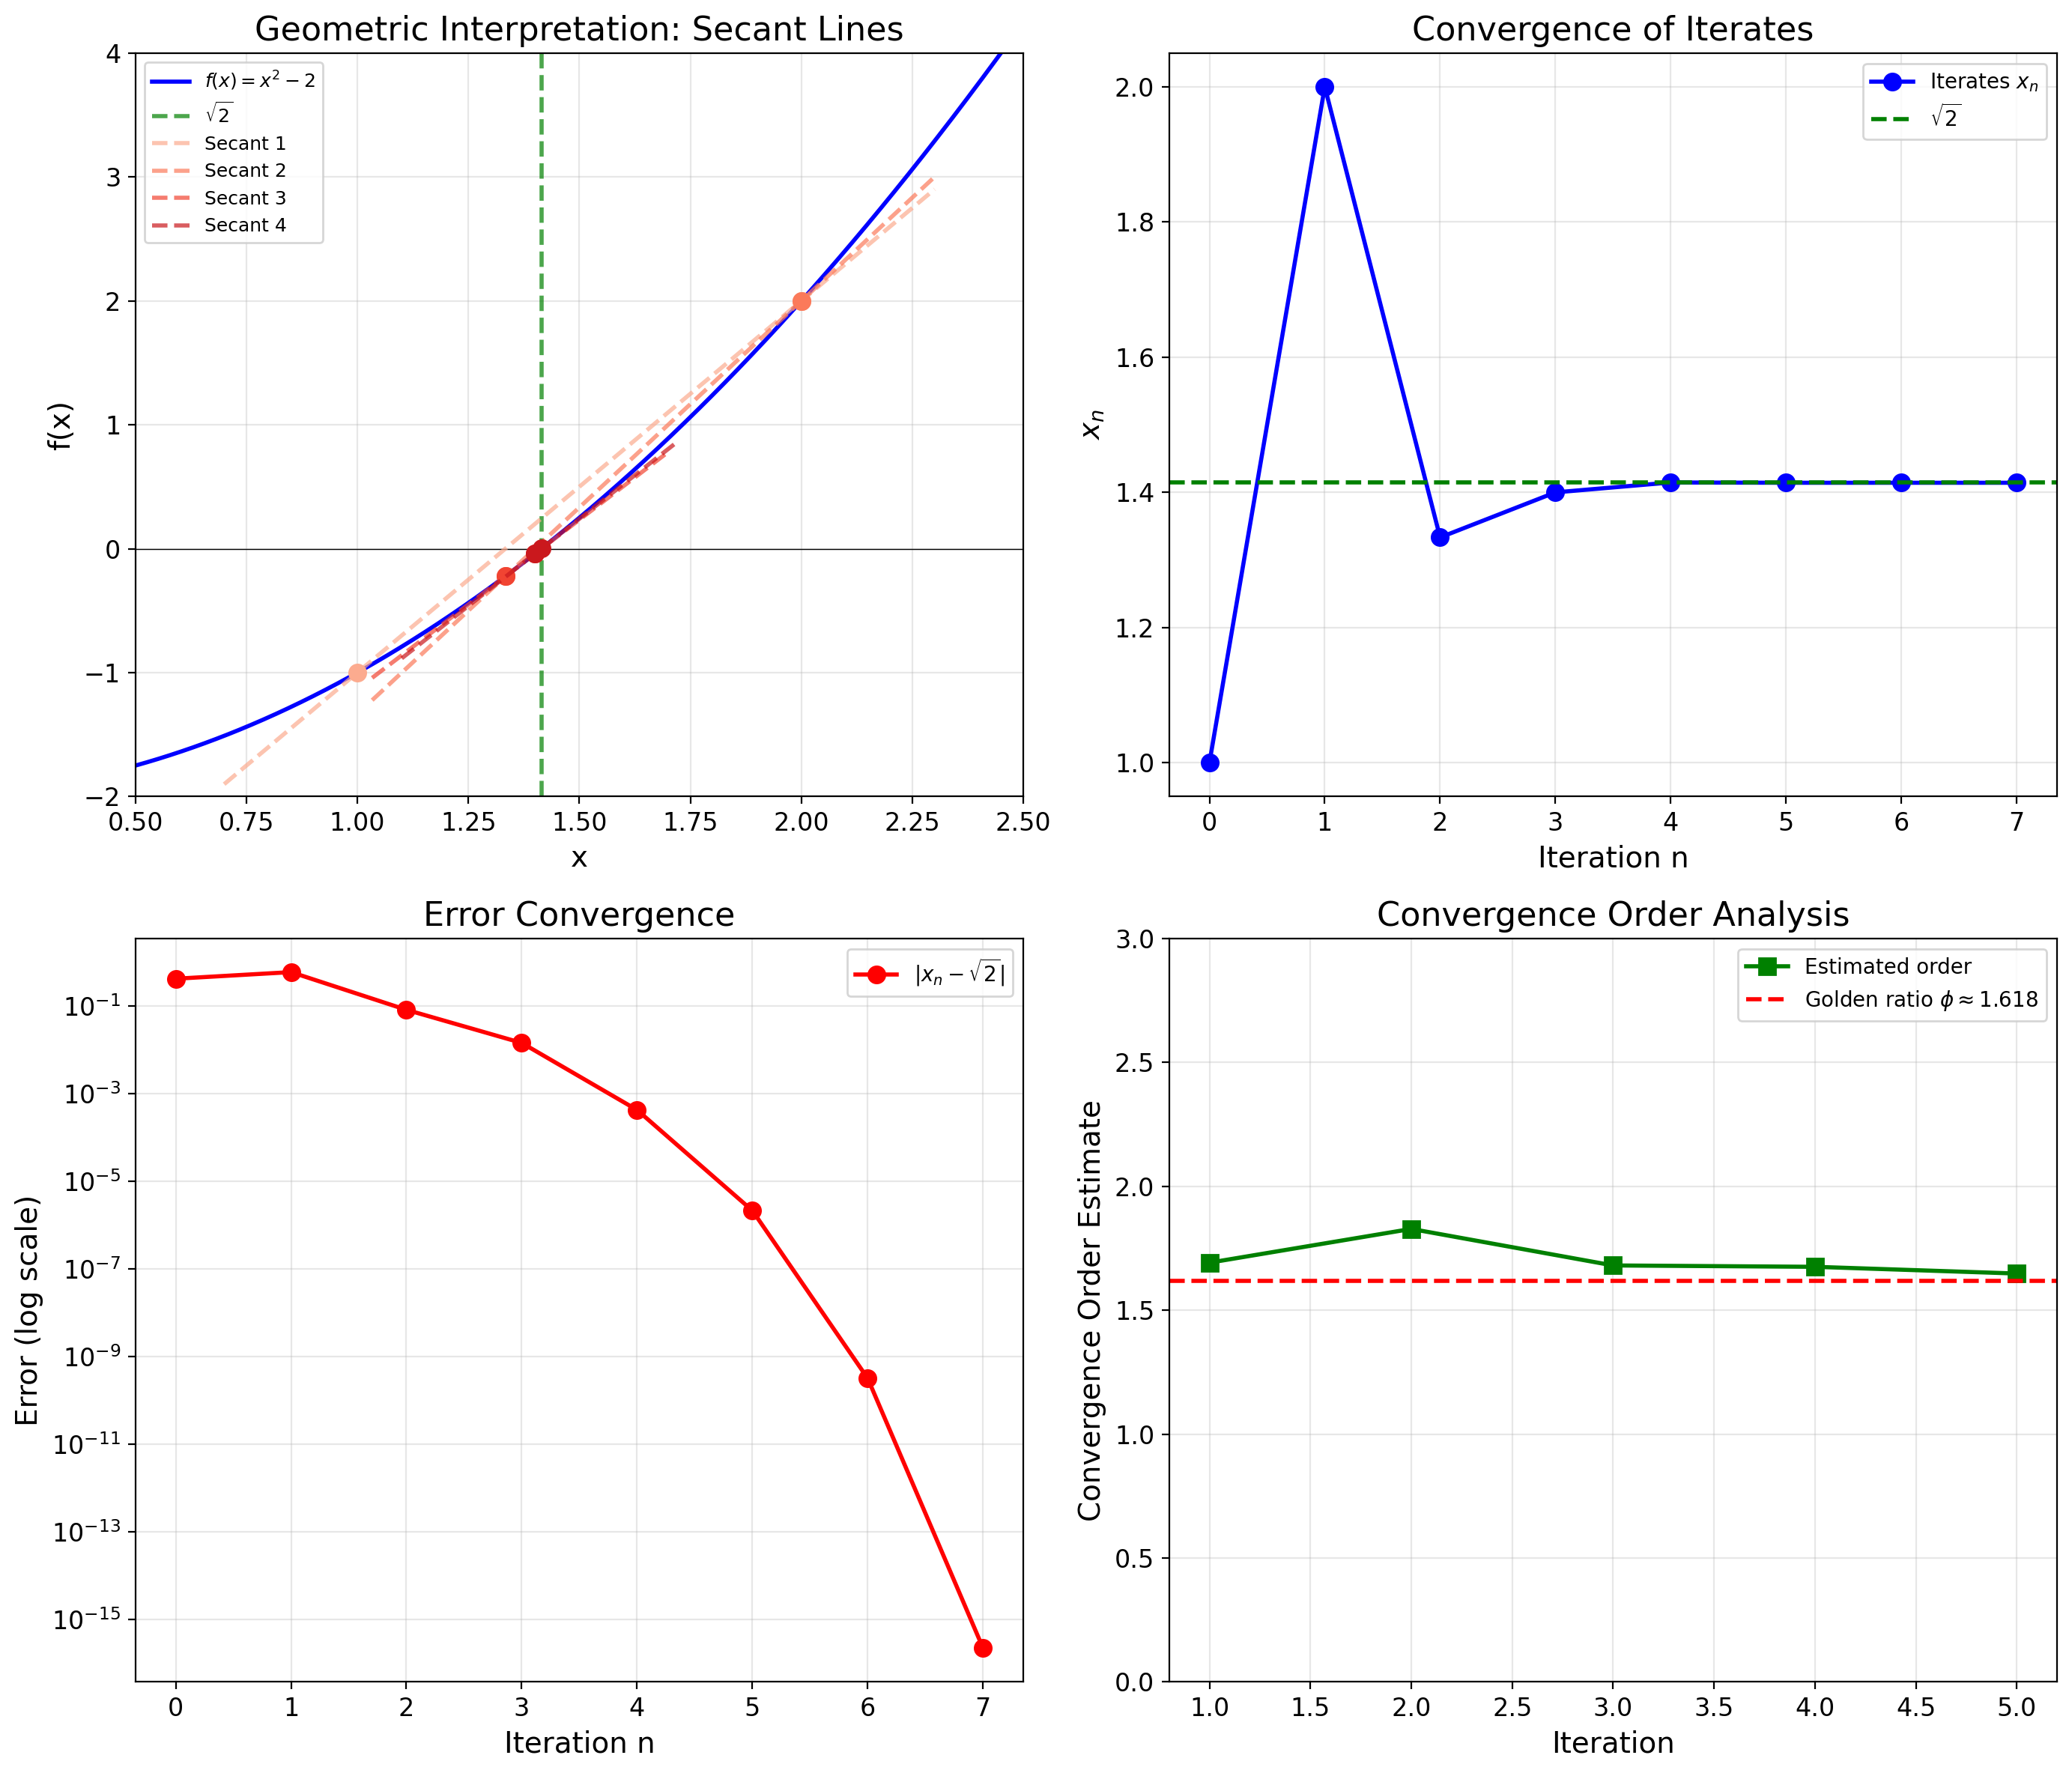


Figure saved to 'plot.png'


In [5]:
# Create figure with multiple subplots
fig = plt.figure(figsize=(14, 12))

# Subplot 1: Geometric visualization of secant method
ax1 = fig.add_subplot(2, 2, 1)

# Plot function f(x) = x^2 - 2
x_plot = np.linspace(0.5, 2.5, 1000)
y_plot = f1(x_plot)

ax1.plot(x_plot, y_plot, 'b-', label=r'$f(x) = x^2 - 2$', linewidth=2)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=np.sqrt(2), color='g', linestyle='--', alpha=0.7, label=r'$\sqrt{2}$')

# Plot first few secant lines
colors = plt.cm.Reds(np.linspace(0.3, 0.9, min(5, len(history1)-1)))
for i in range(min(4, len(history1)-1)):
    x0, x1 = history1[i], history1[i+1]
    y0, y1 = f1(x0), f1(x1)
    
    # Plot secant line
    if abs(x1 - x0) > 1e-10:
        slope = (y1 - y0) / (x1 - x0)
        x_line = np.linspace(min(x0, x1) - 0.3, max(x0, x1) + 0.3, 100)
        y_line = y0 + slope * (x_line - x0)
        ax1.plot(x_line, y_line, color=colors[i], linestyle='--', 
                 alpha=0.7, label=f'Secant {i+1}')
    
    # Mark points
    ax1.plot(x0, y0, 'o', color=colors[i], markersize=8)
    ax1.plot(x1, y1, 'o', color=colors[i], markersize=8)

ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_title('Geometric Interpretation: Secant Lines')
ax1.legend(loc='upper left', fontsize=9)
ax1.set_xlim([0.5, 2.5])
ax1.set_ylim([-2, 4])
ax1.grid(True, alpha=0.3)

# Subplot 2: Convergence of iterates
ax2 = fig.add_subplot(2, 2, 2)

iterations = np.arange(len(history1))
ax2.plot(iterations, history1, 'bo-', markersize=8, label='Iterates $x_n$')
ax2.axhline(y=np.sqrt(2), color='g', linestyle='--', linewidth=2, label=r'$\sqrt{2}$')

ax2.set_xlabel('Iteration n')
ax2.set_ylabel('$x_n$')
ax2.set_title('Convergence of Iterates')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Subplot 3: Error convergence (log scale)
ax3 = fig.add_subplot(2, 2, 3)

# Compute actual errors
true_root = np.sqrt(2)
actual_errors = [abs(x - true_root) for x in history1]

# Filter out zero errors for log plot
nonzero_mask = np.array(actual_errors) > 1e-16
iterations_nz = np.arange(len(history1))[nonzero_mask]
errors_nz = np.array(actual_errors)[nonzero_mask]

ax3.semilogy(iterations_nz, errors_nz, 'ro-', markersize=8, label='$|x_n - \sqrt{2}|$')
ax3.set_xlabel('Iteration n')
ax3.set_ylabel('Error (log scale)')
ax3.set_title('Error Convergence')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Subplot 4: Convergence order estimation
ax4 = fig.add_subplot(2, 2, 4)

# Estimate convergence order: log(e_{n+1})/log(e_n)
if len(errors_nz) > 2:
    log_errors = np.log10(errors_nz)
    # Estimate order using ratio of consecutive log errors
    orders = []
    for i in range(1, len(log_errors)-1):
        if log_errors[i] != 0 and log_errors[i-1] != 0:
            order = log_errors[i+1] / log_errors[i] if log_errors[i] != 0 else 0
            if 0 < order < 3:  # Filter unreasonable values
                orders.append(order)
    
    if orders:
        ax4.plot(range(1, len(orders)+1), orders, 'gs-', markersize=8, 
                 label='Estimated order')
        ax4.axhline(y=1.618, color='r', linestyle='--', linewidth=2, 
                    label=r'Golden ratio $\phi \approx 1.618$')
        ax4.set_xlabel('Iteration')
        ax4.set_ylabel('Convergence Order Estimate')
        ax4.set_title('Convergence Order Analysis')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        ax4.set_ylim([0, 3])

plt.tight_layout()
plt.savefig('secant_method_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved to 'plot.png'")

## Comparison: Secant vs Bisection Method

Let's compare the convergence rates of the secant method and the bisection method.

Comparison: Secant Method vs Bisection Method

Secant Method:
  Iterations to converge: 6
  Final error: 2.22e-16

Bisection Method:
  Iterations to converge: 29
  Final error: 1.12e-11


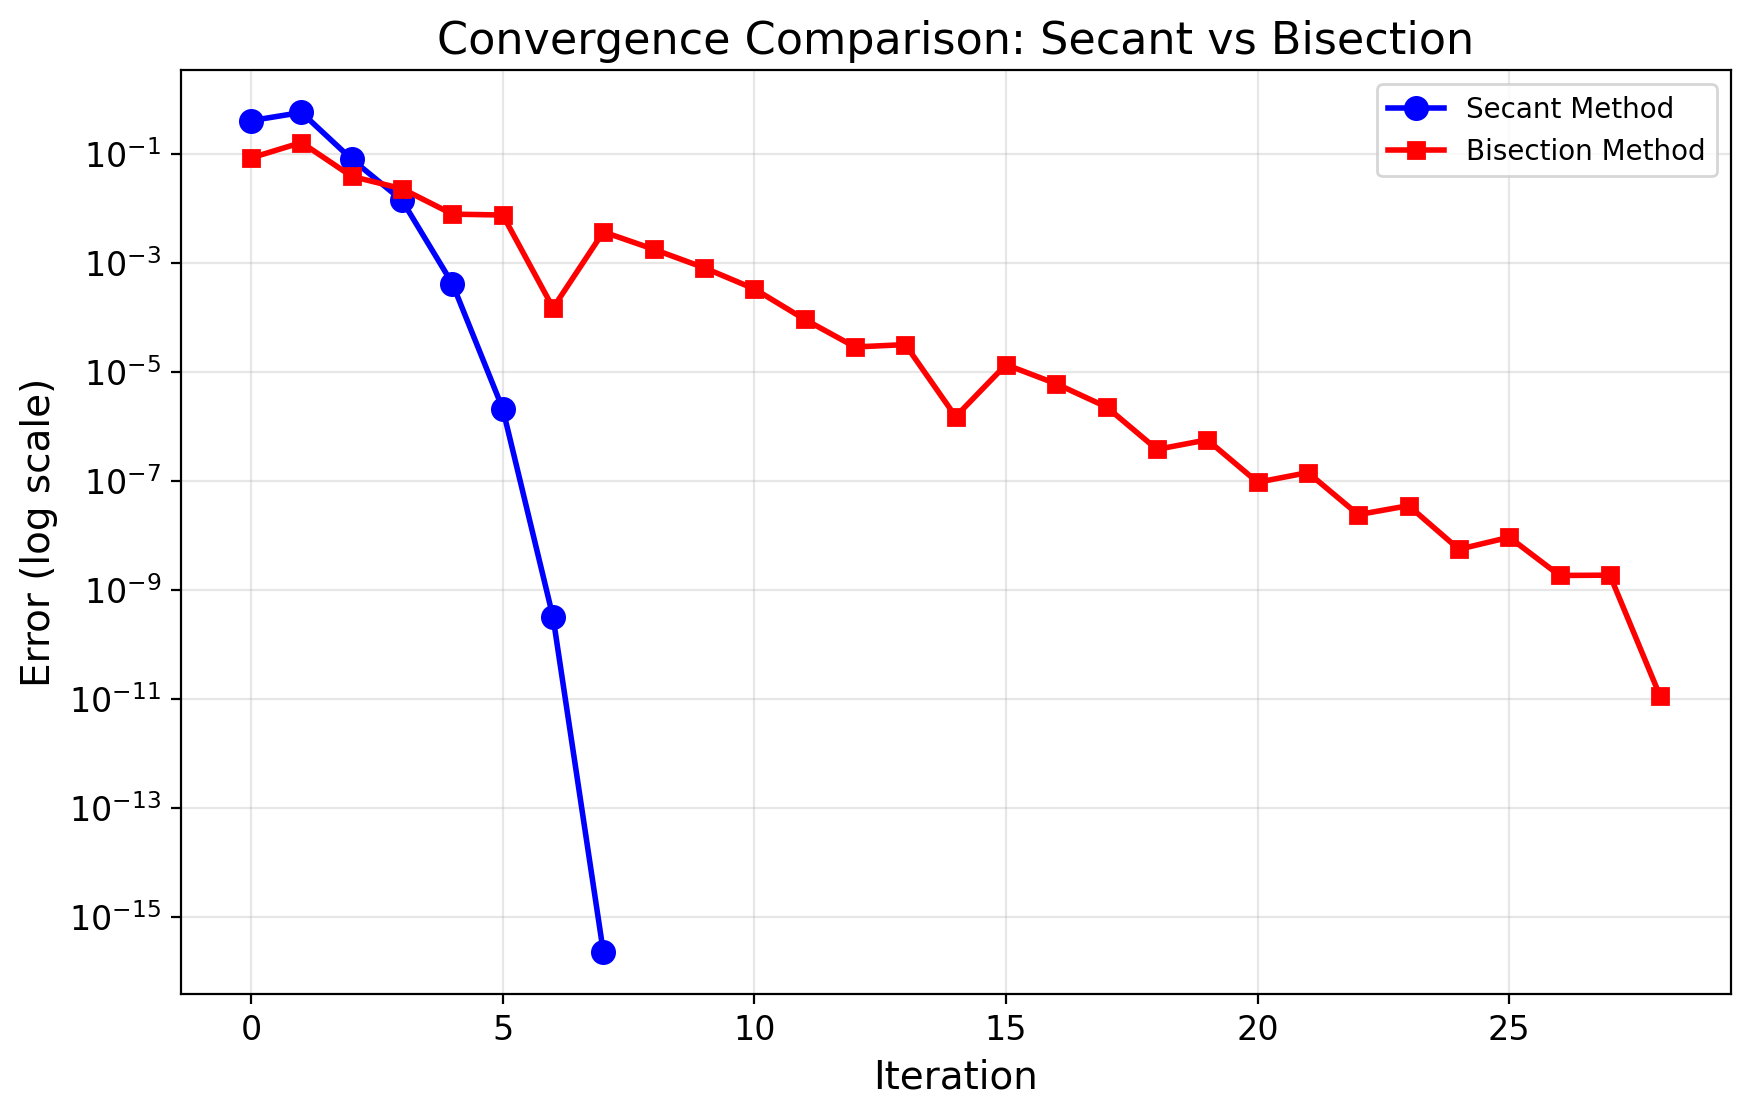

In [6]:
def bisection_method(f, a, b, tol=1e-10, max_iter=100):
    """
    Bisection method for comparison.
    """
    history = []
    
    for i in range(max_iter):
        c = (a + b) / 2
        history.append(c)
        
        if abs(f(c)) < tol or (b - a) / 2 < tol:
            return c, history
        
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    
    return c, history

# Compare methods for finding sqrt(2)
root_bisect, history_bisect = bisection_method(f1, 1.0, 2.0)

# Compute errors
errors_secant = [abs(x - np.sqrt(2)) for x in history1]
errors_bisect = [abs(x - np.sqrt(2)) for x in history_bisect]

print("Comparison: Secant Method vs Bisection Method")
print("=" * 50)
print(f"\nSecant Method:")
print(f"  Iterations to converge: {len(history1) - 2}")
print(f"  Final error: {errors_secant[-1]:.2e}")

print(f"\nBisection Method:")
print(f"  Iterations to converge: {len(history_bisect)}")
print(f"  Final error: {errors_bisect[-1]:.2e}")

# Plot comparison
fig, ax = plt.subplots(figsize=(10, 6))

# Filter for log plot
sec_err = [(i, e) for i, e in enumerate(errors_secant) if e > 1e-16]
bis_err = [(i, e) for i, e in enumerate(errors_bisect) if e > 1e-16]

ax.semilogy([x[0] for x in sec_err], [x[1] for x in sec_err], 
            'bo-', markersize=8, label='Secant Method')
ax.semilogy([x[0] for x in bis_err], [x[1] for x in bis_err], 
            'rs-', markersize=6, label='Bisection Method')

ax.set_xlabel('Iteration')
ax.set_ylabel('Error (log scale)')
ax.set_title('Convergence Comparison: Secant vs Bisection')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

## Analysis of Convergence Order

We can verify that the secant method has convergence order $\phi = \frac{1+\sqrt{5}}{2} \approx 1.618$ by examining the ratio:

$$\frac{\ln|e_{n+1}|}{\ln|e_n|} \to p \text{ as } n \to \infty$$

In [7]:
# More detailed convergence analysis
print("Detailed Convergence Analysis")
print("=" * 60)
print(f"{'n':<4} {'x_n':<20} {'|e_n|':<15} {'Order est.':<12}")
print("-" * 60)

true_val = np.sqrt(2)
prev_error = None
prev_prev_error = None

for i, x in enumerate(history1):
    error = abs(x - true_val)
    
    # Estimate order using |e_{n}| / |e_{n-1}|^p
    if prev_error is not None and prev_prev_error is not None:
        if prev_error > 1e-15 and prev_prev_error > 1e-15 and error > 1e-15:
            # From |e_{n+1}| ≈ C |e_n|^p, estimate p
            log_ratio = np.log(error) / np.log(prev_error)
            order_str = f"{log_ratio:.3f}"
        else:
            order_str = "---"
    else:
        order_str = "---"
    
    if error > 1e-16:
        print(f"{i:<4} {x:<20.15f} {error:<15.2e} {order_str:<12}")
    else:
        print(f"{i:<4} {x:<20.15f} {'< 1e-16':<15} {order_str:<12}")
    
    prev_prev_error = prev_error
    prev_error = error

print("-" * 60)
print(f"\nExpected convergence order (golden ratio): {(1 + np.sqrt(5))/2:.6f}")

Detailed Convergence Analysis
n    x_n                  |e_n|           Order est.  
------------------------------------------------------------
0    1.000000000000000    4.14e-01        ---         
1    2.000000000000000    5.86e-01        ---         
2    1.333333333333333    8.09e-02        4.702       
3    1.400000000000000    1.42e-02        1.691       
4    1.414634146341463    4.21e-04        1.828       
5    1.414211438474870    2.12e-06        1.680       
6    1.414213562057320    3.16e-10        1.675       
7    1.414213562373095    2.22e-16        ---         
------------------------------------------------------------

Expected convergence order (golden ratio): 1.618034


## Conclusion

The Secant Method provides an efficient root-finding algorithm that:

1. **Avoids derivative computation** - Unlike Newton's method, only function evaluations are needed
2. **Converges superlinearly** - With order $\phi \approx 1.618$, faster than bisection ($p=1$) but slower than Newton ($p=2$)
3. **Efficient per iteration** - Only one new function evaluation per iteration after initialization

The method is particularly useful when:
- Derivatives are expensive or difficult to compute
- A good initial bracketing interval is available
- Higher efficiency than bisection is desired without the complexity of computing derivatives

### Key Takeaways

- The secant method approximates the derivative using finite differences
- Convergence order is the golden ratio $\phi$
- Two initial guesses are required
- No guarantee of convergence (unlike bisection), but typically much faster when it does converge